#  importing libraries

In [ ]:
import datetime
import json
import requests
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from flask import Flask, flash, redirect, render_template, request, session, abort

# Download json data 

In [29]:
print("Please insert a station name: ")
station = input()

print("Welcome to:", station.upper())

def check_date():
    date_format = '%Y-%m-%d'
    my_date = input("Enter a date (YYYY-MM-DD): ")
    try:
        datetime.datetime.strptime(my_date, date_format)
    except ValueError:
        return -1
    return 0

while check_date() == -1:
    print("Invalid date")

print("Valid date")

Please insert a station name: 
NANTES-BOUGUENAIS
Welcome to: NANTES-BOUGUENAIS
Enter a date (YYYY-MM-DD): 2023-01-01
Valid date


In [1]:
station = station.upper()
refine = "&refine.nom=" + station
read = requests.get('https://public.opendatasoft.com/api/records/1.0/search/?dataset=donnees-synop-essentielles-omm&q=&sort=date&facet=date&facet=nom&facet=temps_present&facet=libgeo&facet=nom_epci&facet=nom_dept&facet=nom_reg' + refine)
data = read.json()
print(data)
print(json.dumps(data, indent=4, sort_keys=False))


# data registrartion as json file 

In [2]:
path = 'C:/Users/pc/Desktop/main/data'
try :
    os.mkdir(path)
except:
    print("creation of the directory %s failed"%path)
else :
    print("Successfully created the directory %s"%path)
    
with open(path+"/data.json",'w') as json_file :
    json.dump(data ,json_file,indent=4,sort_keys=False)

# json data & csv file

In [32]:
sites = data["records"]
with open('city.csv','w',newline='') as file :
    writer = csv.writer(file)
    writer.writerow(["Hour","Temperature"])
    for elt in sites:
        print(elt["fields"]["nom"])
        temp = round(elt["fields"]["tc"])
        print("   |",temp,"C")
        date=elt["fields"]["date"]
        print("   |",date[0:10])
        print("   |",elt["fields"]["coordonnees"])
        print()
        writer.writerow([date[11:13],temp])


NANTES-BOUGUENAIS
   | 18 C
   | 2023-07-04
   | [47.15, -1.608833]

NANTES-BOUGUENAIS
   | 22 C
   | 2023-07-04
   | [47.15, -1.608833]

NANTES-BOUGUENAIS
   | 22 C
   | 2023-07-04
   | [47.15, -1.608833]

NANTES-BOUGUENAIS
   | 19 C
   | 2023-07-04
   | [47.15, -1.608833]

NANTES-BOUGUENAIS
   | 15 C
   | 2023-07-04
   | [47.15, -1.608833]

NANTES-BOUGUENAIS
   | 14 C
   | 2023-07-04
   | [47.15, -1.608833]

NANTES-BOUGUENAIS
   | 13 C
   | 2023-07-04
   | [47.15, -1.608833]

NANTES-BOUGUENAIS
   | 16 C
   | 2023-07-03
   | [47.15, -1.608833]

NANTES-BOUGUENAIS
   | 20 C
   | 2023-07-03
   | [47.15, -1.608833]

NANTES-BOUGUENAIS
   | 21 C
   | 2023-07-03
   | [47.15, -1.608833]



# data visualization

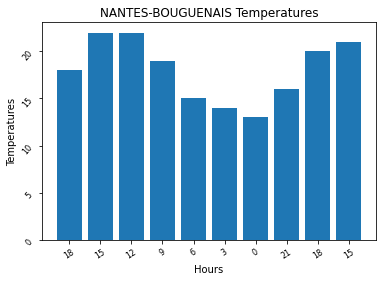

In [33]:
table = pd.read_csv("city.csv",encoding="latin-1",sep=',')
file = open("city.csv")
reader = csv.reader(file)
lines = len(list(reader))
plt.bar(x=np.arange(1,lines),height=table['Temperature'])
table.head()
plt.title(station+" Temperatures")
plt.xticks(np.arange(1,lines), table['Hour'], rotation='33', fontsize=8)
plt.yticks(rotation='50', fontsize=8)
plt.xlabel("Hours")
plt.ylabel("Temperatures")
plt.show()

# building a web app with flask

In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route("/")
def index():
    string = "This is a sample string"
    return render_template('index.html', titre="Welcome!", mots=string.split())

@app.route('/contact')
def contact():
    mail = "aymanemaghouti@gmail.com"
    tel = "0600000000"
    return f"Mail: {mail} --- Tel: {tel}"

@app.route("/members")
def members():
    return "Members"

@app.route("/members/<string:name>/")
def getMember(name):
    return name

if __name__ == "__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Jul/2023 11:12:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2023 11:12:59] "GET /assets/css/main.css HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2023 11:12:59] "GET /images/temperatures.png HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2023 19:44:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jul/2023 19:44:34] "GET /assets/css/main.css HTTP/1.1" 404 -
127.0.0.1 - - [05/Jul/2023 19:44:34] "GET /images/temperatures.png HTTP/1.1" 404 -
